In [1]:
# Import necessary libraries
from fastai.vision import *
import fastai; fastai.__version__

'1.0.61'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os, PIL, math, random

sns.set()
os.listdir('animals2')
np.random.seed(42)
random.seed(42)

In [3]:
os.listdir('animals2')

['bears', 'butterflies', 'horses', 'lions', 'models', 'swans']

## Data loading and preparation 

In [4]:
path = 'animals2'
for folder in ('bears', 'butterflies', 'horses', 'lions', 'swans'):
    print(folder)
    verify_images(os.path.join(path, folder), delete=True, max_size=500)

bears


butterflies


horses


lions


swans


In [5]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=path, valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=0, no_check=True).normalize(imagenet_stats)
# Setting num_workers=0 prevents crushing!

In [6]:
data.classes

['bears', 'butterflies', 'horses', 'lions', 'swans']

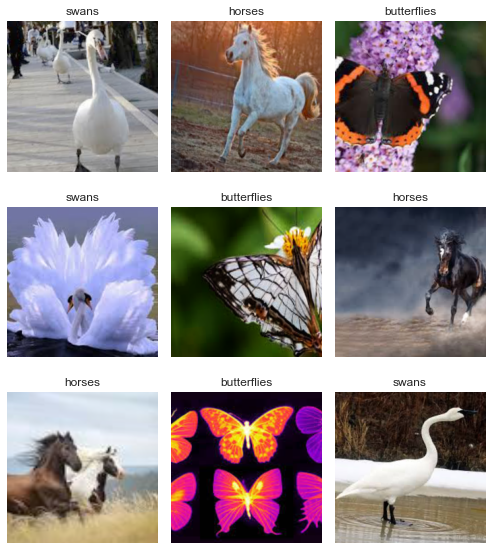

In [7]:
data.show_batch(rows=3, figsize=(7, 8))

In [8]:
from fastai.metrics import error_rate # 1 - accuracy
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# The created model uses the resnet34 architecture, with weights pretrained on the imagenet dataset.
# By default, only the fully connected layers at the top are unfrozen (can be trained), 
# which if you are familiar with transfer learning makes perfect sense.

In [9]:
# defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.156334,0.507536,0.145455,05:11
1,1.135365,0.037069,0.018182,02:32
2,0.747627,0.014707,0.000000,02:52


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


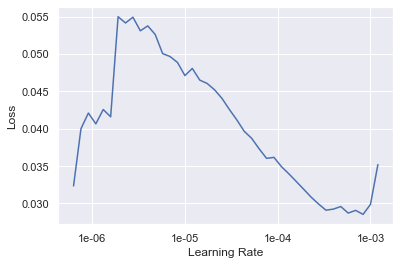

In [11]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(4, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.037622,0.013390,0.000000,06:18
1,0.028434,0.028034,0.018182,05:57
2,0.037151,0.023622,0.018182,04:18
3,0.029214,0.018766,0.018182,05:19


## Interpretation

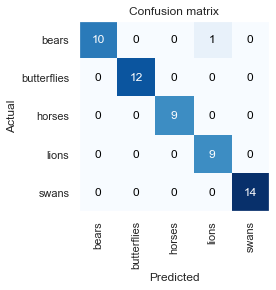

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

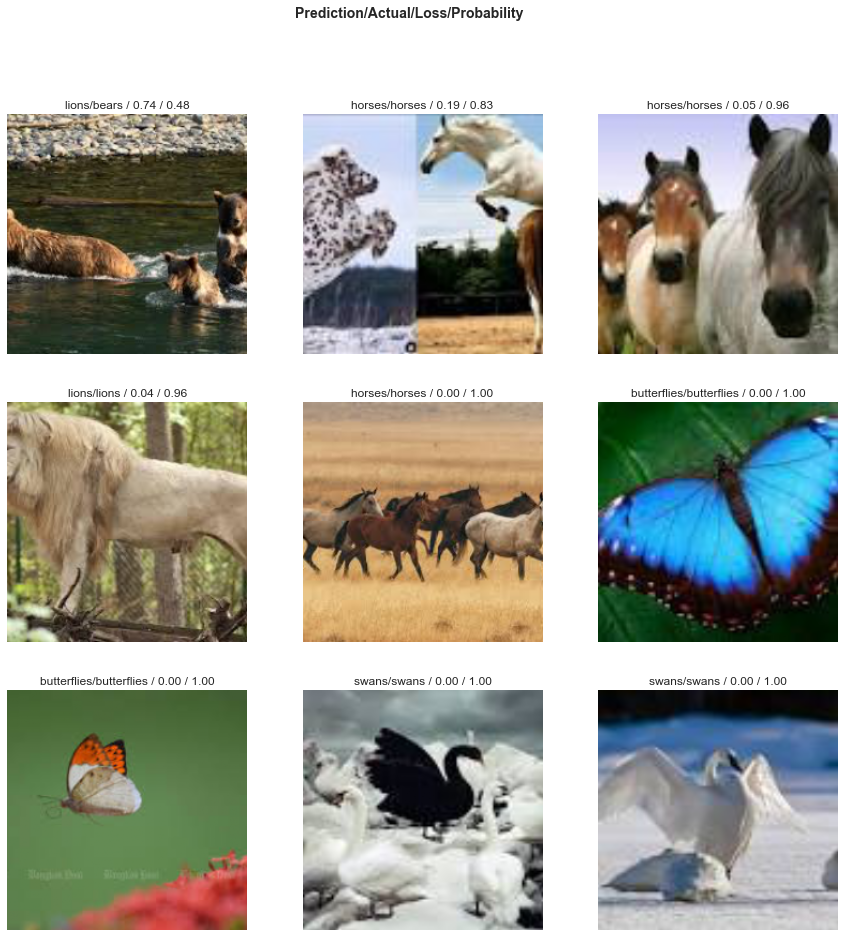

In [14]:
interp.plot_top_losses(9, figsize=(15,15))
# Show images in `top_losses` along with their prediction, actual, loss, and probability of actual class.

In [15]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________